Explained Variance Ratio per component:
[3.56342205e-01 1.74812073e-01 6.87640133e-02 3.96146495e-02
 3.75176456e-02 3.47692047e-02 3.22579004e-02 2.94477230e-02
 2.82996210e-02 2.58614904e-02 2.17279121e-02 2.14797917e-02
 1.99036509e-02 1.90742080e-02 1.81565298e-02 1.74420339e-02
 1.53048304e-02 1.35182209e-02 1.16928235e-02 7.33892735e-03
 6.60655603e-03 6.79896135e-05 4.99297727e-18 3.82624343e-18
 7.01004748e-19 6.58738764e-19 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


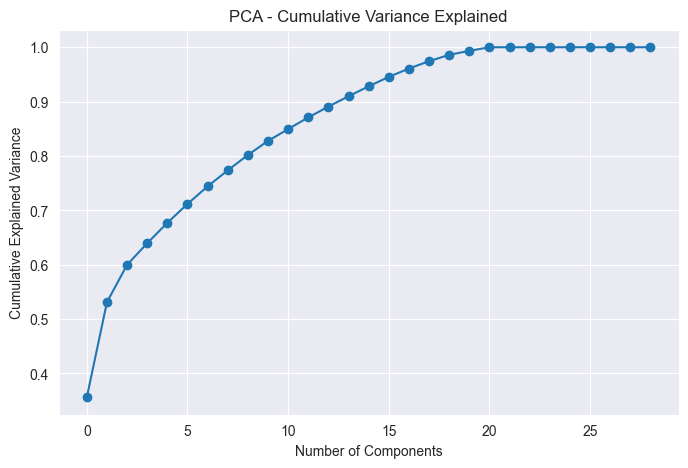

Number of components to preserve 90% variance = 14


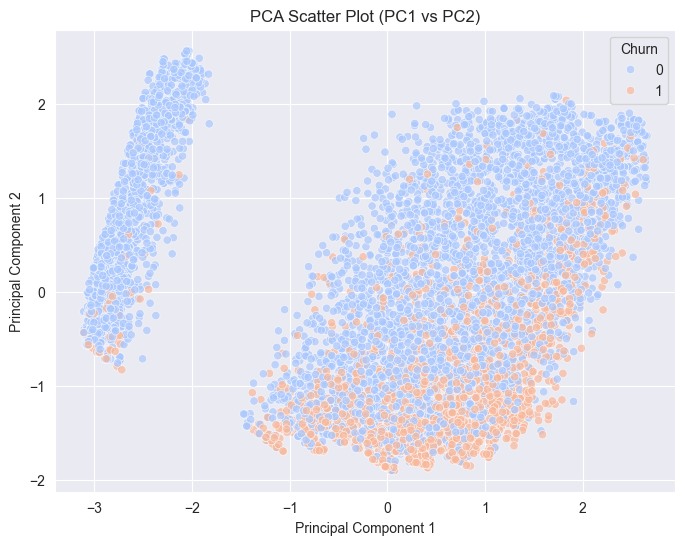


🔹 PCA Feature Loadings (first 5 PCs):
                                            PC1       PC2       PC3       PC4  \
gender                                -0.004079  0.002771 -0.009120 -0.009381   
SeniorCitizen                          0.051434 -0.036495  0.094973 -0.142522   
Partner                                0.044399  0.201327 -0.006541  0.604761   
Dependents                            -0.028027  0.127698 -0.077700  0.641105   
tenure                                 0.223444  0.804111  0.000631 -0.299757   
PhoneService                           0.008041  0.008140  0.280795  0.104487   
PaperlessBilling                       0.114951 -0.078464  0.119701 -0.144266   
MonthlyCharges                         0.597465 -0.071196  0.327876  0.140136   
MultipleLines_No phone service        -0.008041 -0.008140 -0.280795 -0.104487   
MultipleLines_Yes                      0.140094  0.095233  0.318575  0.001073   
InternetService_Fiber optic            0.200624 -0.113384  0.380525  0

In [14]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("../data/data.selected_features_dataset.csv")

# Separate target variable
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X) # Applied PCA

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio per component:")
print(explained_variance)

# Cumulative variance plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Variance Explained")
plt.grid(True)

plt.savefig('../results/eda_visualizations/IT24101520/totalcharges_distribution12.png',
            dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Choose number of components
threshold = 0.90 # Using 90% as in the previous successful run
n_components = np.argmax(np.cumsum(explained_variance) >= threshold) + 1
print(f"Number of components to preserve {threshold*100:.0f}% variance = {n_components}")

# Scatter plot of first 2 principal components
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (PC1 vs PC2)")

plt.savefig('../results/eda_visualizations/IT24101520/totalcharges_distribution13.png',
            dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# PCA loading matrix (to interpret feature contributions)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(explained_variance))],
    index=X.columns
)

print("\n🔹 PCA Feature Loadings (first 5 PCs):")
print(loadings.iloc[:, :5])

In [6]:
# The number of features before PCA is the number of columns in the DataFrame X.
print(f"Number of features before PCA: {X.shape[1]}")

Number of features before PCA: 29


In [8]:
# Select the first n_components from the PCA-transformed data
X_pca_reduced = X_pca[:, :n_components]

print(f"Shape of the reduced dataset (using {n_components} components): {X_pca_reduced.shape}")



Shape of the reduced dataset (using 14 components): (7043, 14)


In [16]:

pca_df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(X_pca_reduced.shape[1])])

pca_df['Churn'] = y.values
output_path = "C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/final_dataset.csv"


pca_df.to_csv(output_path, index=False)

print(f"PCA reduced dataset saved to: {output_path}")

PCA reduced dataset saved to: C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/final_dataset.csv
